<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/07-Machine%20Learning/Linear_Regression_Fake_Data_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

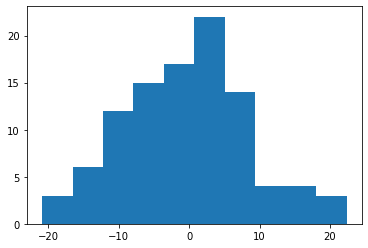


Head Of The Fake DataFrame
         X1        X2          Y
0  0.038932  0.308957  -6.104836
1  0.040132  0.490272   5.551256
2  0.090002  0.859073   2.354461
3  0.264358  1.491609 -10.991890
4  0.302790  2.424725   3.590957
5  0.309879  2.578539  -2.601189
6  0.347360  3.358745  -9.444662


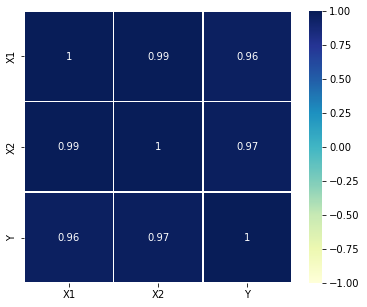

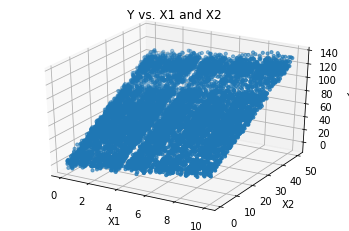

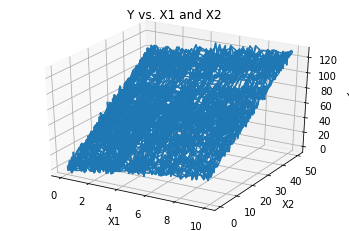

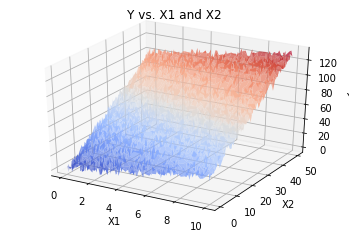


Training Score         = 0.9454804264769481
Model Coefficients     = [2.44534083 2.06085609]

Mean Square Error      = 114.72214288493144
Root Mean Square Error = 10.710842305109876
Mean Absolute Error    = 8.66295018641184
Median Absolute Error  = 7.489962639190633
R^2                    = 0.9129284183580892
Adjusted R^2           = 0.908091108266872


In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn.metrics as sklm
import sklearn.model_selection as sklms
from sklearn.linear_model import LinearRegression as LG


def plotter_3D(X, Y, plt_D):
    XG = np.tile(X, len(X))
    YG = np.tile(Y, len(Y)).T
    
    ZG = plt_D['Xc'] * XG + plt_D['Yc'] * YG
    ZG_noise = np.random.normal(0.0, np.max(YG)*0.07, (len(XG), len(YG)))
    ZG += ZG_noise

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if plt_D['type'] == 'scatter':
        ax.scatter(XG, YG, ZG, s=10)
    elif plt_D['type'] == 'wire':
        ax.plot_wireframe(XG, YG, ZG, rstride=1, cstride=1)
    elif plt_D['type'] == 'surface':
        ax.plot_surface(XG, YG, ZG, cmap=cm.coolwarm, linewidth=0, alpha=.7)

    ax.set_title(plt_D['Title'])
    ax.set_xlabel(plt_D['x_label'])
    ax.set_ylabel(plt_D['y_label'])
    ax.set_zlabel(plt_D['z_label'])

    plt.show()


def print_metrics(y_test, y_pred, n_params):
    # First compute R^2 and the adjusted R^2
    # Print the usual metrics and the R^2 values
    MSE = sklm.mean_squared_error(y_test, y_pred)
    RMSE = (sklm.mean_squared_error(y_test, y_pred))**0.5
    MAE = sklm.mean_absolute_error(y_test, y_pred)
    MedAE = sklm.median_absolute_error(y_test, y_pred)
    r2 = sklm.r2_score(y_test, y_pred)
    r2_adj = (r2 - (n_params - 1) /
              (y_test.shape[0] - n_params) * (1 - r2))

    print('Mean Square Error      = ' + str(MSE))
    print('Root Mean Square Error = ' + str(RMSE))
    print('Mean Absolute Error    = ' + str(MAE))
    print('Median Absolute Error  = ' + str(MedAE))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))


num_pts = 100
X1 = np.sort(np.random.uniform(0, 10, num_pts)).reshape(-1, 1)
X2 = np.sort(np.random.uniform(0, 50, num_pts)).reshape(-1, 1)
Y = 3 * X1 + 2 * X2  # We pretend we do not know these coefficients

Y_noise = np.random.normal(0.0, np.max(Y)*0.07, len(X1)).reshape(-1, 1)
plt.hist(Y_noise)
plt.show()

Y += Y_noise

fake_df = pd.DataFrame(data=np.hstack((X1, X2, Y.reshape(-1, 1))))
fake_df.columns = ['X1', 'X2', 'Y']
print("\nHead Of The Fake DataFrame")
print(fake_df.head(7))  # show top 7 lines, default = 5

fake_df.corr()

corr = fake_df.corr()  # create map
plt.figure(figsize=(6, 5))
sns.heatmap(round(corr, 3), annot=True,
            vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.show()

plt_D = {'Xc': 3, 'Yc': 2, 'Title': 'Y vs. X1 and X2',
         'x_label': 'X1', 'y_label': 'X2', 'z_label': 'Y'}

plt_D['type'] = 'scatter'
plotter_3D(X1, X2, plt_D)

plt_D['type'] = 'wire'
plotter_3D(X1, X2, plt_D)

plt_D['type'] = 'surface'
plotter_3D(X1, X2, plt_D)


X = np.hstack((X1, X2))
X_train, X_test, Y_train, Y_test = sklms.train_test_split(
    X, Y, test_size=0.2, random_state=42, shuffle=True)

lg_mod = LG(fit_intercept=False, copy_X=True)
lg_mod.fit(X_train, Y_train)
print('\nTraining Score         = ' + str(lg_mod.score(X_train, Y_train)))
print('Model Coefficients     = ' + str(lg_mod.coef_[0]))

Y_pred = lg_mod.predict(X_test)
print()
print_metrics(Y_test, Y_pred, 2)

# Upcoming work
# plt_D['type'] = 'wire'
# X1_test = np.linspace(0, 10, 20, endpoint=True).reshape(-1, 1)
# X2_test = np.linspace(0, 50, 20, endpoint=True).reshape(-1, 1)
# plt_D['Xc'] = lg_mod.coef_[0][0]
# plt_D['Yc'] = lg_mod.coef_[0][1]
# plotter_3D(X1_test, X2_test, plt_D)